# FARSANA K S                          
## ASSIGNMENT II                                                                                                         - PHY 5132                

### QUESTION 1
### Make a box plot for the number of sunspot dataset. Report the minimum, maximum, lower quartile, median and upper quartile values of the dataset. What fraction of the dataset are outliers?


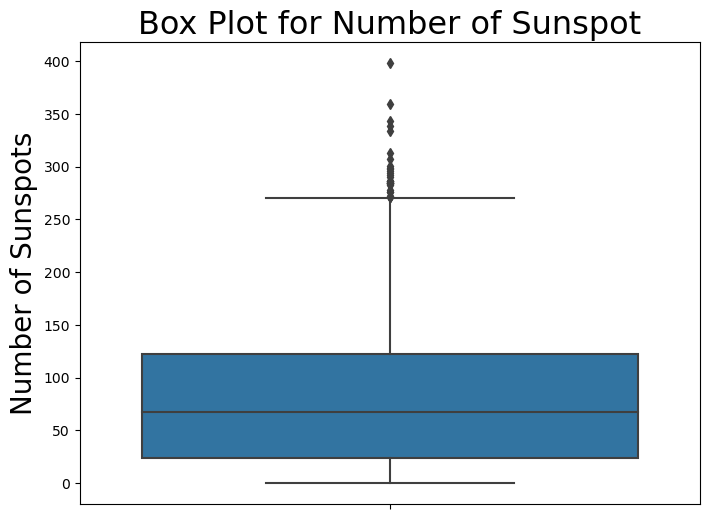

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sunspots = pd.read_csv('Sunspots.csv')

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=sunspots, y='Monthly_Mean_Total_Sunspot_Number')
plt.title('Box Plot for Number of Sunspot', fontsize = 23)
plt.ylabel('Number of Sunspots',fontsize = 20)
plt.show()

In [2]:
# Extract the 'Monthly_Mean_Total_Sunspot_Number' column
sunspot_data = sunspots['Monthly_Mean_Total_Sunspot_Number']

# Calculate the desired statistics
minimum = sunspot_data.min()
maximum = sunspot_data.max()
lower_quartile = sunspot_data.quantile(0.25)
median = sunspot_data.median()
upper_quartile = sunspot_data.quantile(0.75)

# Print the results
print("Minimum:", minimum)
print("Maximum:", maximum)
print("Lower Quartile (25th Percentile):", lower_quartile)
print("Median (50th Percentile):", median)
print("Upper Quartile (75th Percentile):", upper_quartile)

Minimum: 0.0
Maximum: 398.2
Lower Quartile (25th Percentile): 23.9
Median (50th Percentile): 67.2
Upper Quartile (75th Percentile): 122.5


## Inferences from the above Box Plot:
### Minimum Value: 0
### Maximum Value: 398.2
### Lower Quartile (25th Percentile) Value: 23.9
### Upper Quartile (75th Percentile) Value: 122.5
### Median (50th Percentile): 67.2

In [4]:
# Extract the 'Monthly_Mean_Total_Sunspot_Number' column
sunspot_data = sunspots['Monthly_Mean_Total_Sunspot_Number']

# Calculate the interquartile range (IQR) and whisker values
Q1 = sunspot_data.quantile(0.25)
Q3 = sunspot_data.quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Identify data points between the upper whisker and the maximum value
data_between_whisker_and_max = sunspot_data[(sunspot_data > upper_whisker) & (sunspot_data <= sunspot_data.max())]

# Get the total number of data points
total_data_points = sunspots.shape[0]

#Calculate the fraction of outliers
outliers = len(data_between_whisker_and_max) / total_data_points 

# Print the results
print("Outliers:", outliers)

Outliers: 0.009494640122511486


###  0.9494640122511486 % of the total data points are outliers

### QUESTION 2
###  Using the GRB catalog data that is provided to you, calculate what is the probability that if we identify a GRB as short (T90 < 2 seconds), it has a fluence of the order of 10^{−4 } 𝑒𝑟𝑔/𝑐𝑚^2 ? 

### We need to use conditional probability for this problem:
### $${\displaystyle P(A\mid B)={\frac {P(A\cap B)}{P(B)}}}$$
### where:
### - $A$ is the event that the GRB has a fluence of the order of $10^{−4 } 𝑒𝑟𝑔/𝑐𝑚^2$
### - $B$ is the event with T90 $<$ 2sec

In [16]:
from astropy.table import Table
import matplotlib.pyplot as plt
t1 = Table.read('Fermi_GBM_catalog_15_8_22.txt',format='ascii',guess=False, delimiter='|')

# Convert individual columns of the Astropy Table to a dictionary
data_dict = {'T90': t1['t90'], 'fluence': t1['fluence']}


In [17]:
import pandas as pd
# Create a DataFrame from the dictionary
df = pd.DataFrame(data_dict)
df.head(10)

,T90,fluence
0,4.288,2.396400e-07
1,17.408,2.194900e-05
2,13.056,1.603100e-06
3,12.032,2.988000e-06
4,9.216,1.123100e-06
5,8.960,1.376500e-06
6,0.320,1.401800e-07
7,12.288,1.042800e-06
8,9.216,3.850300e-07
9,81.154,4.081100e-06


In [18]:
fluence = df['fluence']
T90 = df['T90']

In [27]:
import math
math.floor(math.log10(fluence[0]))

-7

In [19]:
# Compute the order of magnitudes
import math

om = []

for fluence_value in fluence:
    if fluence_value > 0:
        om.append(math.floor(math.log10(fluence_value)))
    else:
        om.append(float('-inf'))  # Handle zero or negative values

In [21]:
import numpy as np

# Find the indices where both conditions are met (A intersection B)
indices = np.where((T90 < 2) & (om == -4))

selected_entries = df.iloc[indices]

# Calculate the probablity 
print('Probability of (A|B) =',len(selected_entries)/len(T90 < 2))

Probability of (A|B) = 0.0


### QUESTION 3
###  Determine the fraction of probability contained within the +/- 1, 2 and 3 sigma zone around the mean of the following probability distribution functions

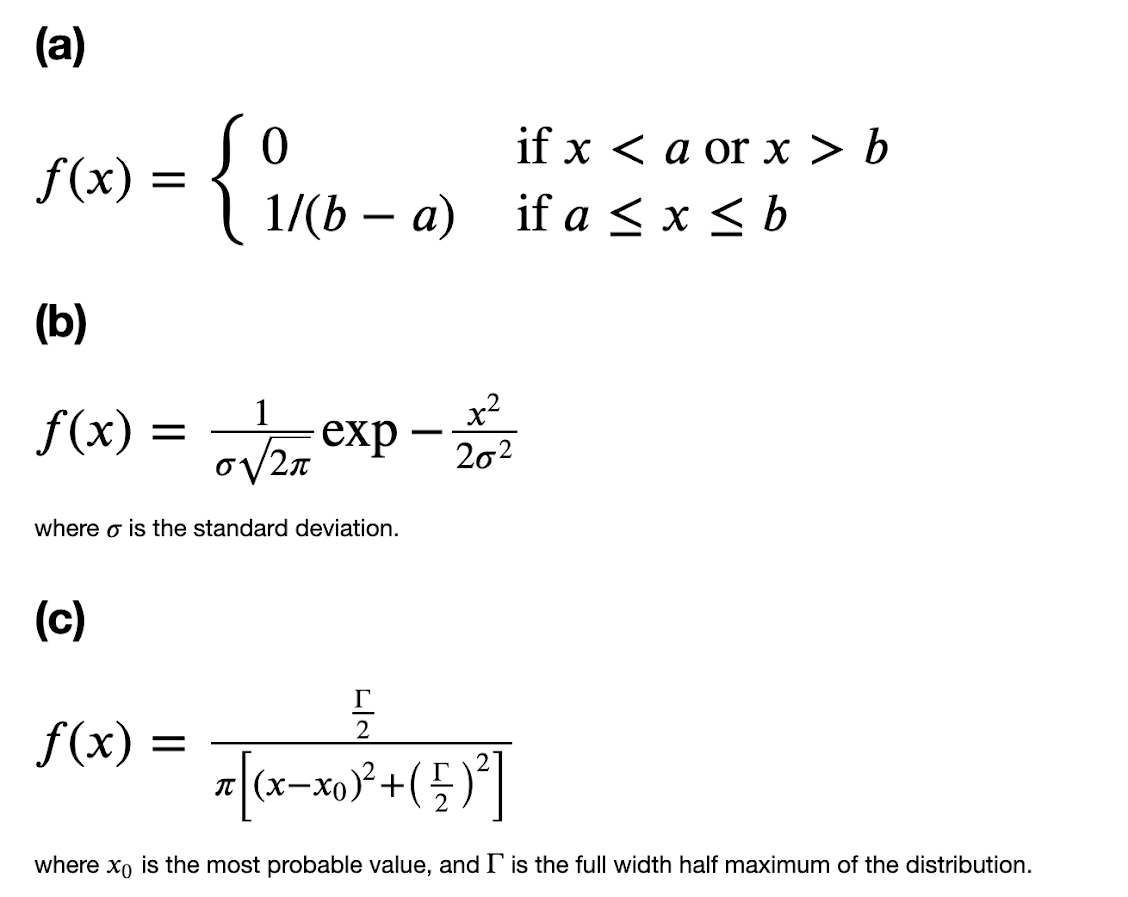

### Uniform distribution

In [20]:
import numpy as np
x = np.linspace(-100,100,1000000)

def uniform(x,y):###defining a uniform function
    return(np.random.uniform(x,y,1000000))
uy= uniform(0,1)


####Uniform Distribution

print("Fraction of probability within +/- 1 sigma:",(len(uy[(uy<=np.mean(uy)+np.std(uy))&(uy>=np.mean(uy)-np.std(uy))])/len(uy)))
print("Fraction of probability within +/- 2 sigma:",(len(uy[(uy<=np.mean(uy)+2*np.std(uy))&(uy>=np.mean(uy)-2*np.std(uy))])/len(uy)))
print("Fraction of probability within +/- 3 sigma:",(len(uy[(uy<np.mean(uy)+3*np.std(uy))&(uy>=np.mean(uy)-3*np.std(uy))])/len(uy)))


Fraction of probability within +/- 1 sigma: 0.577511
Fraction of probability within +/- 2 sigma: 1.0
Fraction of probability within +/- 3 sigma: 1.0


### Normal distribution

Fraction of probability within +/- 1 sigma: 0.682592
Fraction of probability within +/- 2 sigma: 0.95434
Fraction of probability within +/- 3 sigma: 0.997324


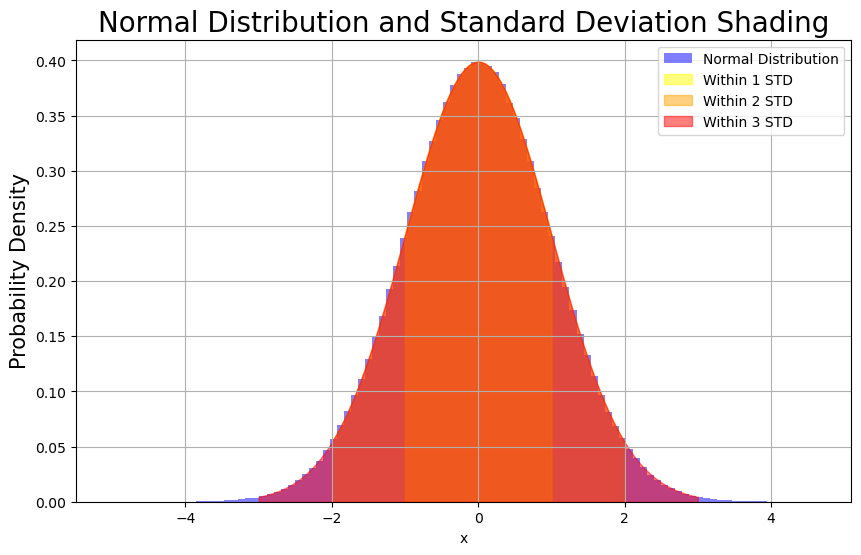

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-100,100,1000000)

def normal(m, std):
    return(np.random.normal(m, std,1000000))
ny= normal(0, 1)

###Normal Distribution
print("Fraction of probability within +/- 1 sigma:",(len(ny[(ny<=np.mean(ny)+np.std(ny))&(ny>=np.mean(ny)-np.std(ny))])/len(ny)))
print("Fraction of probability within +/- 2 sigma:",(len(ny[(ny<=np.mean(ny)+2*np.std(ny))&(ny>=np.mean(ny)-2*np.std(ny))])/len(ny)))
print("Fraction of probability within +/- 3 sigma:",(len(ny[(ny<=np.mean(ny)+3*np.std(ny))&(ny>=np.mean(ny)-3*np.std(ny))])/len(ny)))

# Create the plot
plt.figure(figsize=(10, 6))
plt.hist(ny, bins=100, density=True, alpha=0.5, color='blue', label='Normal Distribution')

# Calculate mean and standard deviation
mean = np.mean(ny)
std_dev = np.std(ny)

# Shade regions within 1, 2, and 3 standard deviations
plt.fill_between(x, 0, 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std_dev**2)),
                 where=(x < mean + std_dev) & (x > mean - std_dev), color='yellow', alpha=0.5, label='Within 1 STD')
plt.fill_between(x, 0, 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std_dev**2)),
                 where=(x < mean + 2*std_dev) & (x > mean - 2*std_dev), color='orange', alpha=0.5, label='Within 2 STD')
plt.fill_between(x, 0, 1 / (std_dev * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std_dev**2)),
                 where=(x < mean + 3*std_dev) & (x > mean - 3*std_dev), color='red', alpha=0.5, label='Within 3 STD')

plt.xlabel('x')
plt.ylabel('Probability Density',fontsize = 15)
plt.title('Normal Distribution and Standard Deviation Shading',fontsize = 20)
plt.legend()
plt.grid()
plt.show()


### The given distribution

Fraction within 1 STD =  0.981776
Fraction within 2 STD =  0.987188
Fraction within 3 STD =  0.98982


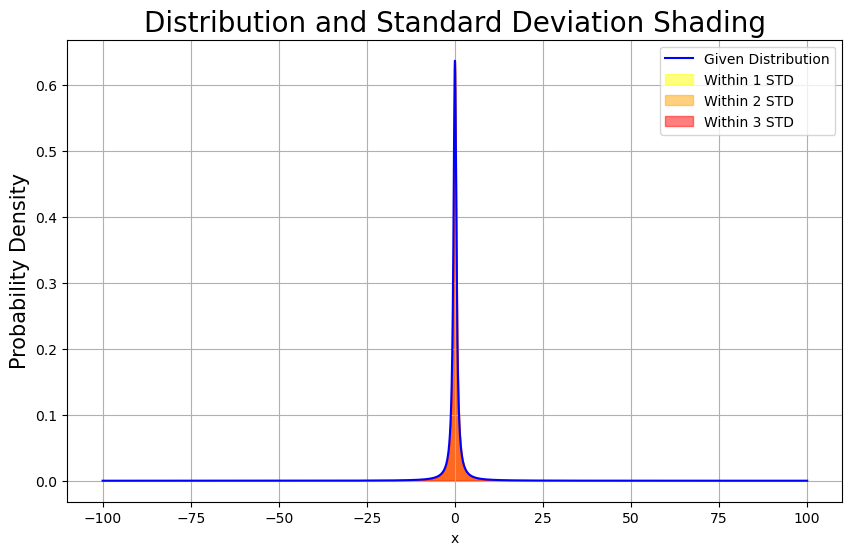

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-100,100,1000000)

def function(x0, x, p):
    f= (p/2)/(np.pi*((x-x0)**2+(p/2)**2))
    return(f)
fy= function(0, x, 1)

####Given  Distribution
print("Fraction within 1 STD = ",(len(fy[(fy<np.mean(fy)+np.std(fy))&(fy>np.mean(fy)-np.std(fy))])/len(fy)))
print("Fraction within 2 STD = ",(len(fy[(fy<np.mean(fy)+2*np.std(fy))&(fy>np.mean(fy)-2*np.std(fy))])/len(fy)))
print("Fraction within 3 STD = ",(len(fy[(fy<np.mean(fy)+3*np.std(fy))&(fy>np.mean(fy)-3*np.std(fy))])/len(fy)))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, fy, label='Given Distribution', color='blue')

# Shade regions within 1, 2, and 3 standard deviations
plt.fill_between(x, fy, where=(fy < mean + std_dev) & (fy > mean - std_dev), color='yellow', alpha=0.5, label='Within 1 STD')
plt.fill_between(x, fy, where=(fy < mean + 2*std_dev) & (fy > mean - 2*std_dev), color='orange', alpha=0.5, label='Within 2 STD')
plt.fill_between(x, fy, where=(fy < mean + 3*std_dev) & (fy > mean - 3*std_dev), color='red', alpha=0.5, label='Within 3 STD')

plt.xlabel('x')
plt.ylabel('Probability Density',fontsize = 15)
plt.title('Distribution and Standard Deviation Shading',fontsize = 20)
plt.legend()
plt.grid()
plt.show()


### QUESTION 4
### A person in general may cough 0.01% the time, however, this season's common cold has increased the symptom of coughing to 15% . In a doctor's clinic, there are 50 people, out of which 60% of them are sick. What is the probability of a random person in the room is sick given he coughs?

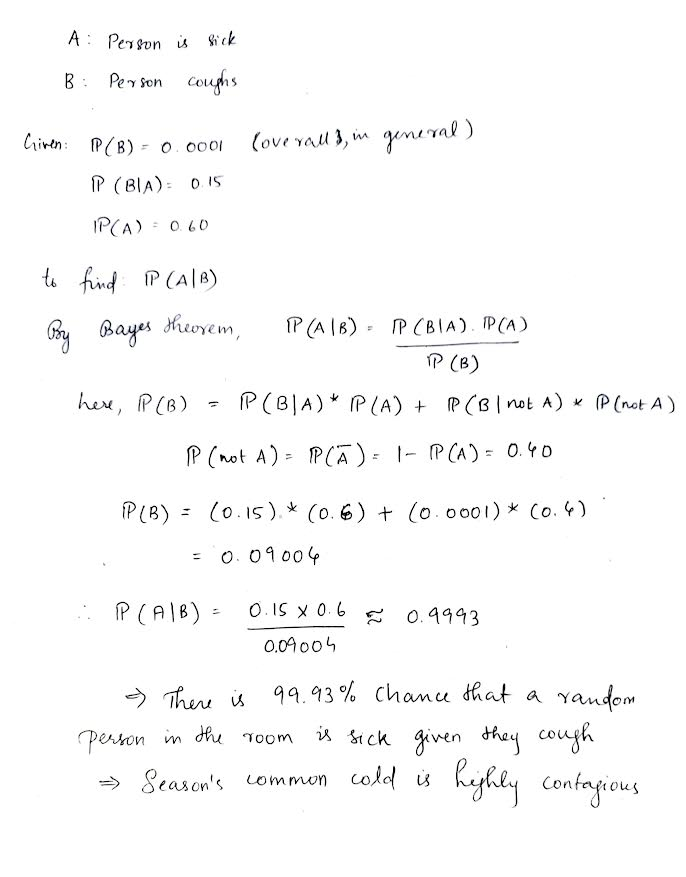

### QUESTION 5
### Write a function in python to estimate the mean, variance, skewness and kurtosis of a given random variable. Demonstrate the estimate of the values for an example random variable and cross check the values obtained with that from scipy.stats for the example random variate considered. 

In [87]:
import math

def mean(x):
    avg = sum(x) / len(x)
    return avg

def var(x):
    avg = sum(x) / len(x)
    squared_diff = [(xi - avg) ** 2 for xi in x]
    variance = sum(squared_diff) / (len(x) - 1)  # Use (n-1) for sample variance
    return variance

def skew(x):
    avg = sum(x) / len(x)
    variance = var(x)
    cub = [(xi - avg) ** 3 for xi in x]
    sd = math.sqrt(variance)
    skewness = sum(cub) / ((len(x) - 1) * sd ** 3)  # Use (n-1) for sample skewness
    return skewness

def kurt(x):
    avg = sum(x) / len(x)
    squared_avg = avg ** 2
    variance = var(x) 
    diff = [(xi - avg) ** 4 for xi in x]
    kurtosis = sum(diff) / (len(x) * (variance ** 2)) - 3 # Use (n-1) for sample kurtosis
    return kurtosis


In [88]:
import numpy as np
from scipy import stats

# Generate an example random variable (sampled from a normal distribution)
np.random.seed(0)
example_data = np.random.normal(loc=2, scale=1, size=100)

# Use the provided functions to estimate the statistics
mean_estimated = mean(example_data)
variance_estimated = var(example_data)
skewness_estimated = skew(example_data)
kurtosis_estimated = kurt(example_data)

# Use scipy.stats to calculate the statistics
mean_scipy = np.mean(example_data)
variance_scipy = np.var(example_data, ddof=1)  # Use ddof=1 for sample variance
skewness_scipy = stats.skew(example_data, bias=False) # Use bias=False for sample skewness
kurtosis_scipy = stats.kurtosis(example_data, bias=False) # Use bias=False for sample kurtosis

# Print the estimated and scipy.stats values for comparison
print("Estimated Mean:", mean_estimated)
print("Estimated Variance:", variance_estimated)
print("Estimated Skewness:", skewness_estimated)
print("Estimated Kurtosis:", kurtosis_estimated)
print("\nScipy Mean:", mean_scipy)
print("Scipy Variance:", variance_scipy)
print("Scipy Skewness:", skewness_scipy)
print("Scipy Kurtosis:", kurtosis_scipy)


Estimated Mean: 2.059808015534485
Estimated Variance: 1.0260874941564964
Estimated Skewness: 0.005145915541710852
Estimated Kurtosis: -0.43052530095613406

Scipy Mean: 2.059808015534485
Scipy Variance: 1.0260874941564961
Scipy Skewness: 0.00525093422623553
Scipy Kurtosis: -0.33548992339308814


### QUESTION 6
### Plot and compare the moments of the normal, uniform and Laplace distributions using the above function. Which distribution is more tailed than normal?

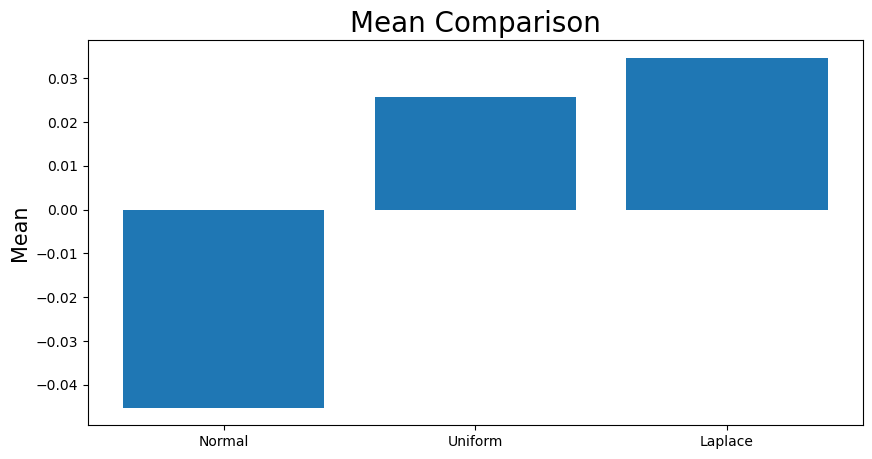

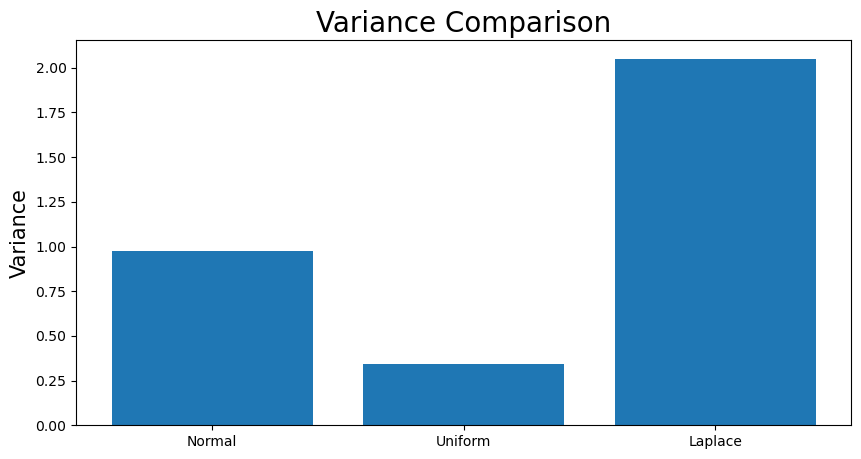

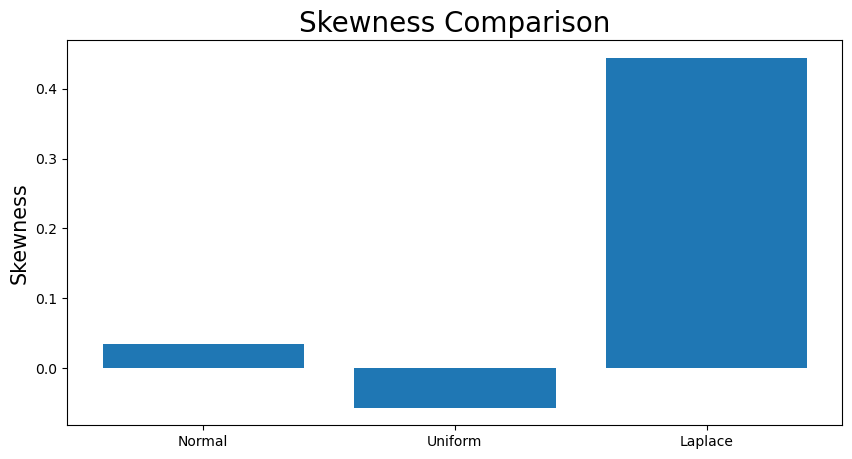

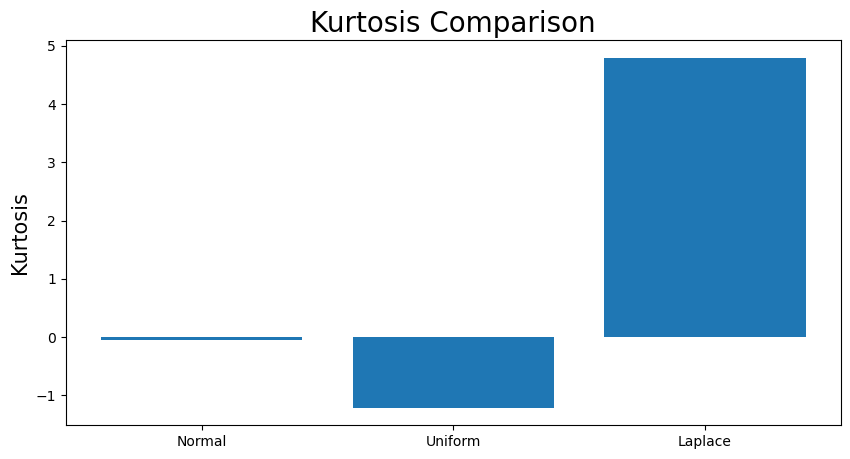

normal_moments:
 (-0.04525670749019531, 0.9752096659781343, 0.03384201952455238, -0.05266983859570784)
uniform_moments:
 (0.025731479651951345, 0.3416207441466619, -0.05675994539943708, -1.214783356872479)
laplace_moments:
 (0.03466123543837945, 2.0510878840391618, 0.4441616041581499, 4.795907697143203)


In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random variables from different distributions
np.random.seed(0)
normal_data = np.random.normal(loc=0, scale=1, size=1000)  # Normal distribution
uniform_data = np.random.uniform(low=-1, high=1, size=1000)  # Uniform distribution
laplace_data = np.random.laplace(loc=0, scale=1, size=1000)  # Laplace distribution

# Define function to calculate moments
def moments(data):
    mean_val = mean(data)
    var_val = var(data)
    skewness_val = skew(data)
    kurtosis_val = kurt(data)
    return mean_val, var_val, skewness_val, kurtosis_val

# Calculate moments for each distribution
normal_moments = moments(normal_data)
uniform_moments = moments(uniform_data)
laplace_moments = moments(laplace_data)

# Labels for the distributions
distribution_labels = ['Normal', 'Uniform', 'Laplace'] 

# Moments data
moments_data = [normal_moments, uniform_moments, laplace_moments]

# Create bar plots for each moment
for i, moment_label in enumerate(['Mean', 'Variance', 'Skewness', 'Kurtosis']):
    moments_values = [dist_moment[i] for dist_moment in moments_data]
    plt.figure(figsize=(10, 5))
    plt.bar(distribution_labels, moments_values)
    plt.title(moment_label + ' Comparison',fontsize = 20)
    plt.ylabel(moment_label, fontsize = 15)
    plt.show()

# Print the moments
print("normal_moments:\n",normal_moments)
print("uniform_moments:\n",uniform_moments)
print("laplace_moments:\n",laplace_moments)

### INFERENCE
### The distribution with a higher mean, variance, skewness, or kurtosis compared to the normal distribution, is considered to be more tailed. From the above plot, the Laplace distribution has heavier tails compared to the normal distribution.

### QUESTION 7
### A book club classifies members as heavy, medium, or light purchasers, and separate mailings are prepared for each of these groups. Overall, 20% of the members are heavy purchasers, 30% medium, and 50% light. A member is not classified into a group until 18 months after joining the club, but a test is made of the feasibility of using the first 3 months’ purchases to classify members. The  percentages obtained from existing records of individuals classified as heavy, medium, or light purchasers is shown in the attached table. If a member purchases no books in the first 3 months, what is the probability that the member is a light purchaser?

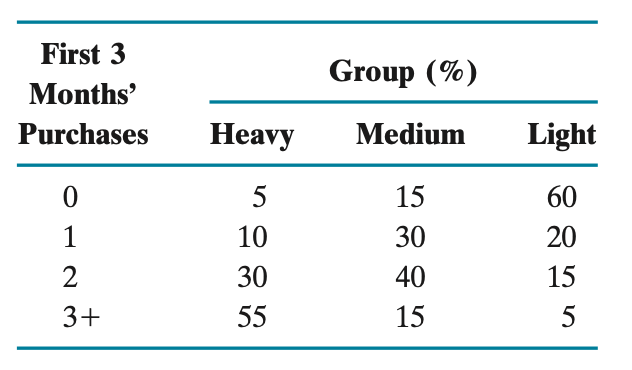

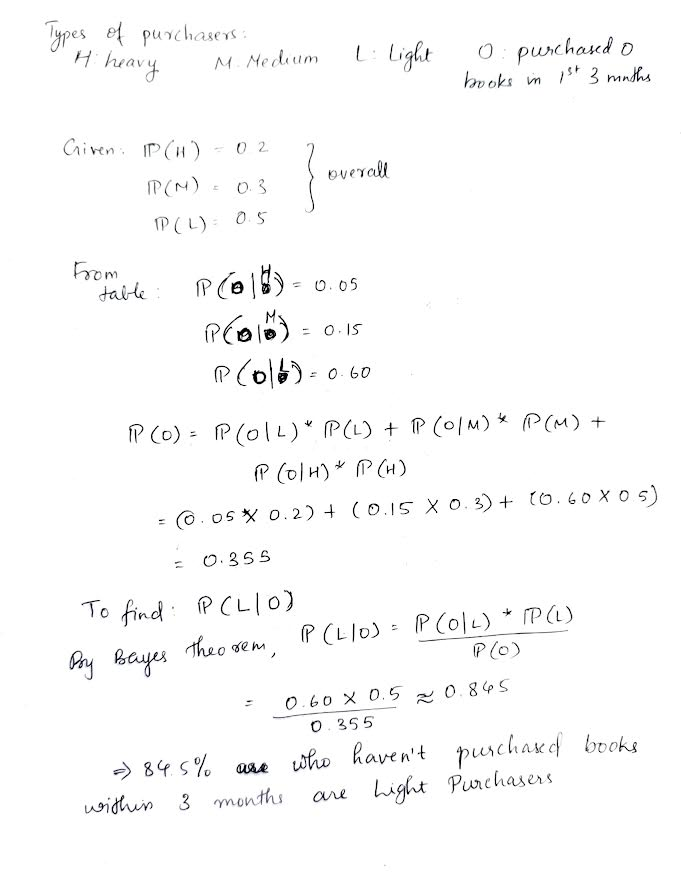